In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Update this path based on your extracted file location
file_path = "/content/drive/MyDrive/CIC-IDS2017/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv"

# Load dataset
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())

# Check dataset info
print(df.info())

# Check for missing values
print(df.isnull().sum())


    Destination Port   Flow Duration   Total Fwd Packets  \
0                 22             166                   1   
1              60148              83                   1   
2                123           99947                   1   
3                123           37017                   1   
4                  0       111161336                 147   

    Total Backward Packets  Total Length of Fwd Packets  \
0                        1                            0   
1                        2                            0   
2                        1                           48   
3                        1                           48   
4                        0                            0   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                             0                       0   
1                             0                       0   
2                            48                      48   
3                            48                 

In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 35630


In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")

Shape after removing duplicates: (252972, 79)


In [ ]:
# Check for missing values
missing_values = df.isnull().sum().sum()
print(f"Total missing values: {missing_values}")

Total missing values: 15


In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

# Confirm missing values are removed
missing_values_after = df.isnull().sum().sum()
print(f"Total missing values after removal: {missing_values_after}")

Total missing values after removal: 0


Highly correlated feature pairs (>|0.9| correlation):
(' Flow Duration', 'Fwd IAT Total')
(' Flow Duration', 'Bwd IAT Total')
(' Total Fwd Packets', ' Total Backward Packets')
(' Total Fwd Packets', ' Total Length of Bwd Packets')
(' Total Fwd Packets', ' Fwd Header Length')
(' Total Fwd Packets', ' Fwd Header Length.1')
(' Total Fwd Packets', 'Subflow Fwd Packets')
(' Total Fwd Packets', ' Subflow Bwd Packets')
(' Total Fwd Packets', ' Subflow Bwd Bytes')
(' Total Backward Packets', ' Total Length of Bwd Packets')
(' Total Backward Packets', ' Fwd Header Length')
(' Total Backward Packets', ' Bwd Header Length')
(' Total Backward Packets', ' Fwd Header Length.1')
(' Total Backward Packets', 'Subflow Fwd Packets')
(' Total Backward Packets', ' Subflow Bwd Packets')
(' Total Backward Packets', ' Subflow Bwd Bytes')
('Total Length of Fwd Packets', ' Subflow Fwd Bytes')
(' Total Length of Bwd Packets', ' Fwd Header Length')
(' Total Length of Bwd Packets', ' Bwd Header Length')
(' Total L

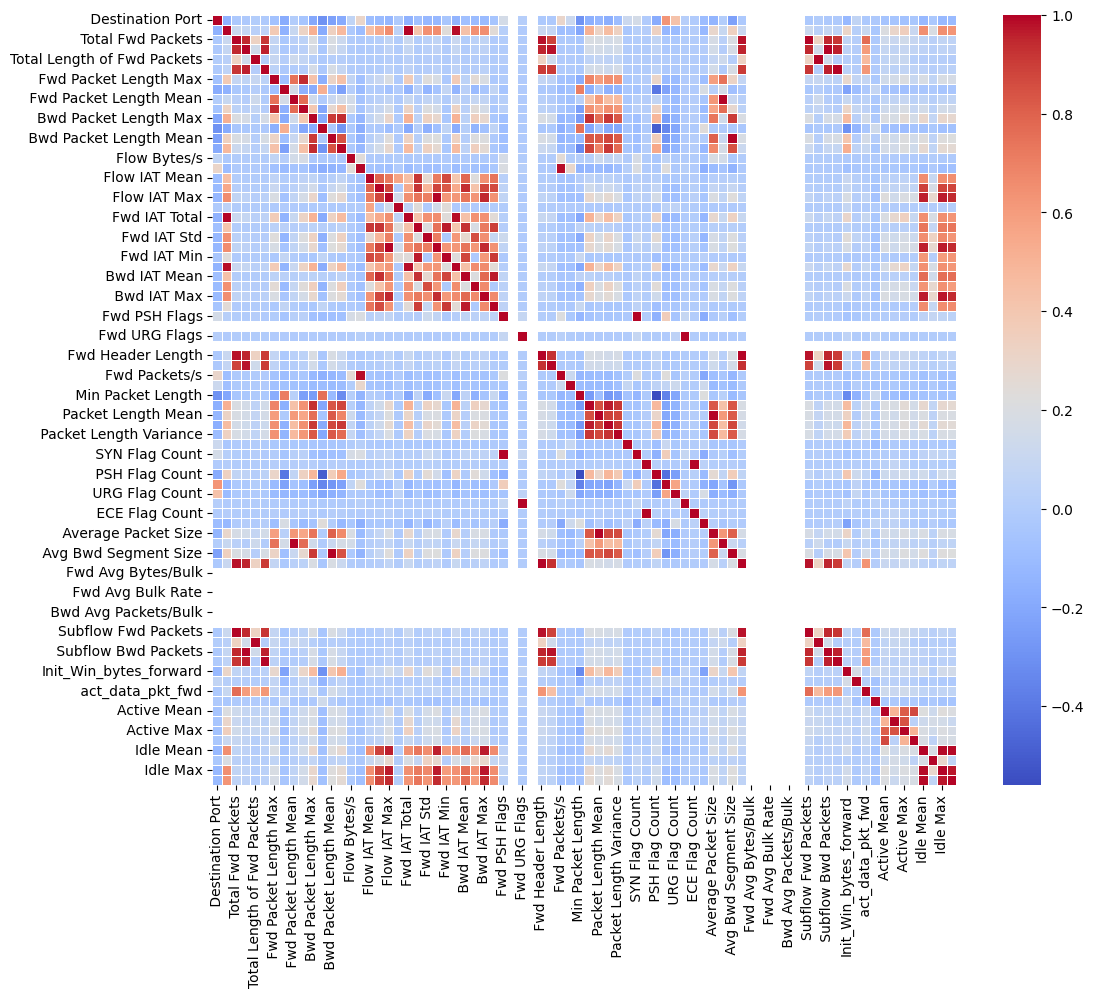

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select only numerical columns
df_numeric = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Set a threshold (e.g., 0.9)
threshold = 0.9

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)

# Identify highly correlated features
high_corr_pairs = np.where(np.abs(corr_matrix) > threshold)
high_corr_pairs = [(corr_matrix.index[i], corr_matrix.columns[j])
                   for i, j in zip(*high_corr_pairs) if i != j and i < j]

print("Highly correlated feature pairs (>|0.9| correlation):")
for pair in high_corr_pairs:
    print(pair)

plt.show()

Dropping 30 highly correlated features:
{'Bwd IAT Total', ' Fwd Header Length.1', ' Max Packet Length', 'Subflow Fwd Packets', ' Bwd IAT Max', ' Bwd Packet Length Std', 'Fwd Packets/s', ' Subflow Bwd Packets', ' Packet Length Std', ' Idle Min', ' ECE Flag Count', ' Idle Max', ' Average Packet Size', ' Fwd Packet Length Std', ' Avg Fwd Segment Size', 'Fwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Min', ' Subflow Bwd Bytes', ' CWE Flag Count', ' Avg Bwd Segment Size', ' Bwd Packet Length Mean', ' SYN Flag Count', ' Fwd IAT Max', 'Idle Mean', ' Fwd Header Length', ' Subflow Fwd Bytes', ' Fwd IAT Mean', ' Total Backward Packets', ' Total Length of Bwd Packets'}


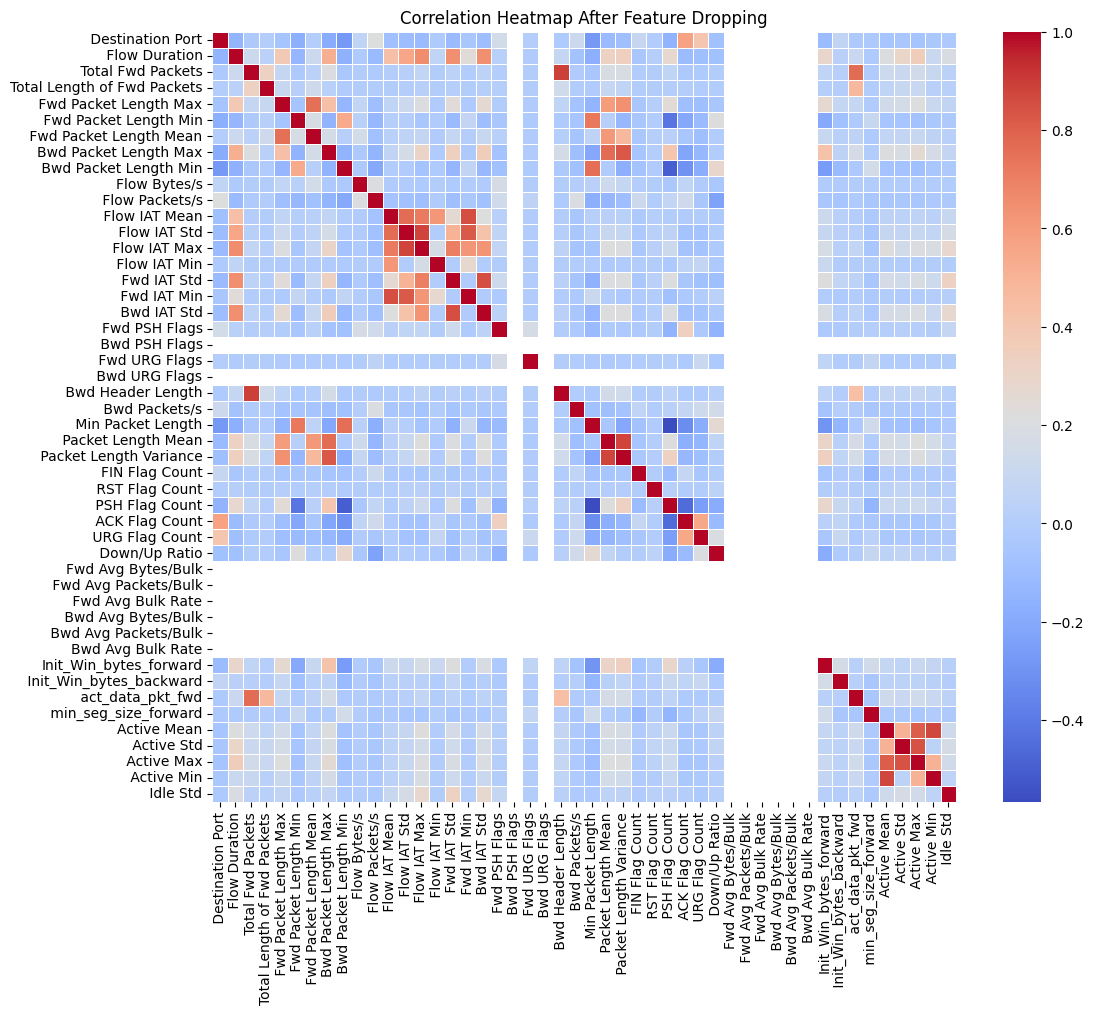

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset (ensure you use the cleaned dataset)
df = pd.read_csv("/content/drive/MyDrive/CIC-IDS2017/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")  # Change to your actual dataset

# Select numerical columns only
df_numeric = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = df_numeric.corr().abs()

# Set a correlation threshold
threshold = 0.9

# Find highly correlated feature pairs
high_corr_pairs = np.where(corr_matrix > threshold)
high_corr_pairs = [(corr_matrix.index[i], corr_matrix.columns[j]) for i, j in zip(*high_corr_pairs) if i != j and i < j]

# Automatically select features to drop
features_to_drop = set()
for feature1, feature2 in high_corr_pairs:
    if feature1 not in features_to_drop and feature2 not in features_to_drop:
        features_to_drop.add(feature2)  # Drop one of the correlated features

print(f"Dropping {len(features_to_drop)} highly correlated features:")
print(features_to_drop)

# Drop the selected features
df_cleaned = df.drop(columns=features_to_drop, errors='ignore')

# Save the cleaned dataset
df_cleaned.to_csv("cleaned_dataset.csv", index=False)

# Verify with a new correlation heatmap
# Compute correlation matrix using only numeric columns
df_numeric_cleaned = df_cleaned.select_dtypes(include=[np.number])

# Verify with a new correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric_cleaned.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap After Feature Dropping")
plt.show()



In [ ]:
# Check for missing values
missing_values = df_cleaned.isnull().sum()
print(missing_values[missing_values > 0])

Flow Bytes/s    18
dtype: int64


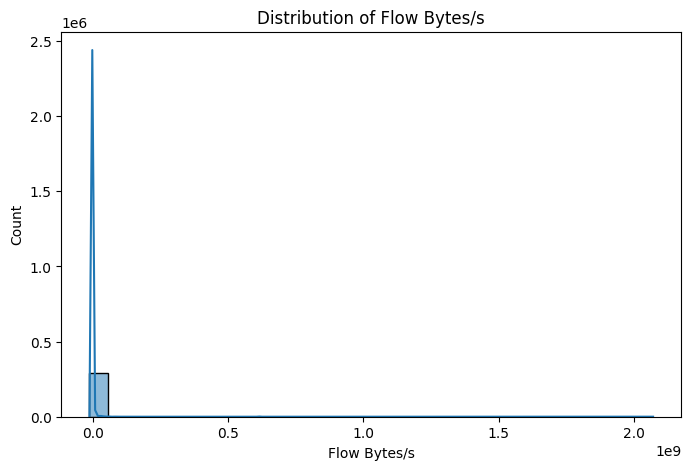

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Flow Bytes/s'], kde=True, bins=30)
plt.title('Distribution of Flow Bytes/s')
plt.show()

In [ ]:
df_cleaned = df_cleaned.copy()  # Ensures we modify the actual DataFrame

# Replace inf values with NaN first
df_cleaned['Flow Bytes/s'] = df_cleaned['Flow Bytes/s'].replace([np.inf, -np.inf], np.nan)

# Replace NaN with the 99th percentile of valid values
finite_max = df_cleaned['Flow Bytes/s'].quantile(0.99)
df_cleaned['Flow Bytes/s'] = df_cleaned['Flow Bytes/s'].fillna(finite_max)


In [ ]:
df_cleaned['Flow Bytes/s'] = df_cleaned['Flow Bytes/s'].fillna(df_cleaned['Flow Bytes/s'].median())

In [ ]:
df_cleaned['Flow Bytes/s'] = np.log1p(df_cleaned['Flow Bytes/s'])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


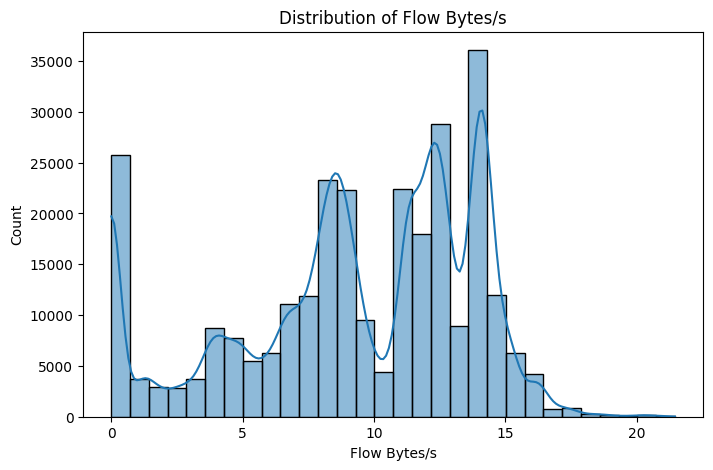

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned['Flow Bytes/s'], kde=True, bins=30)
plt.title('Distribution of Flow Bytes/s')
plt.show()

In [ ]:
# Check for missing values
missing_values = df_cleaned.isnull().sum()
print(missing_values[missing_values > 0])

Flow Bytes/s    4
dtype: int64


In [ ]:
# Now check unique labels
print(df[' Label'].unique())

['BENIGN' 'Infiltration']


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_cleaned[' Label'] = label_encoder.fit_transform(df_cleaned[' Label'])  # Convert to 0 and 1

In [ ]:
print(df_cleaned[' Label'].unique())

[0 1]


In [ ]:
import numpy as np

# Check for infinite values
print(np.isinf(df_cleaned).sum())

 Destination Port                0
 Flow Duration                   0
 Total Fwd Packets               0
Total Length of Fwd Packets      0
 Fwd Packet Length Max           0
 Fwd Packet Length Min           0
 Fwd Packet Length Mean          0
Bwd Packet Length Max            0
 Bwd Packet Length Min           0
Flow Bytes/s                     0
 Flow Packets/s                207
 Flow IAT Mean                   0
 Flow IAT Std                    0
 Flow IAT Max                    0
 Flow IAT Min                    0
 Fwd IAT Std                     0
 Fwd IAT Min                     0
 Bwd IAT Std                     0
Fwd PSH Flags                    0
 Bwd PSH Flags                   0
 Fwd URG Flags                   0
 Bwd URG Flags                   0
 Bwd Header Length               0
 Bwd Packets/s                   0
 Min Packet Length               0
 Packet Length Mean              0
 Packet Length Variance          0
FIN Flag Count                   0
 RST Flag Count     

In [ ]:
df_cleaned[' Flow Packets/s'].replace(np.inf, df_cleaned[' Flow Packets/s'][df_cleaned[' Flow Packets/s'] != np.inf].mean(), inplace=True)


<ipython-input-65-98b65e27ec3e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[' Flow Packets/s'].replace(np.inf, df_cleaned[' Flow Packets/s'][df_cleaned[' Flow Packets/s'] != np.inf].mean(), inplace=True)


In [ ]:
print(np.isinf(df_cleaned).sum())  # Should now be 0 for all columns


 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
Total Length of Fwd Packets    0
 Fwd Packet Length Max         0
 Fwd Packet Length Min         0
 Fwd Packet Length Mean        0
Bwd Packet Length Max          0
 Bwd Packet Length Min         0
Flow Bytes/s                   0
 Flow Packets/s                0
 Flow IAT Mean                 0
 Flow IAT Std                  0
 Flow IAT Max                  0
 Flow IAT Min                  0
 Fwd IAT Std                   0
 Fwd IAT Min                   0
 Bwd IAT Std                   0
Fwd PSH Flags                  0
 Bwd PSH Flags                 0
 Fwd URG Flags                 0
 Bwd URG Flags                 0
 Bwd Header Length             0
 Bwd Packets/s                 0
 Min Packet Length             0
 Packet Length Mean            0
 Packet Length Variance        0
FIN Flag Count                 0
 RST Flag Count                0
 PSH Flag Count                0
 ACK Flag 

In [ ]:
print(df_cleaned.isna().sum())


 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
Total Length of Fwd Packets    0
 Fwd Packet Length Max         0
 Fwd Packet Length Min         0
 Fwd Packet Length Mean        0
Bwd Packet Length Max          0
 Bwd Packet Length Min         0
Flow Bytes/s                   4
 Flow Packets/s                0
 Flow IAT Mean                 0
 Flow IAT Std                  0
 Flow IAT Max                  0
 Flow IAT Min                  0
 Fwd IAT Std                   0
 Fwd IAT Min                   0
 Bwd IAT Std                   0
Fwd PSH Flags                  0
 Bwd PSH Flags                 0
 Fwd URG Flags                 0
 Bwd URG Flags                 0
 Bwd Header Length             0
 Bwd Packets/s                 0
 Min Packet Length             0
 Packet Length Mean            0
 Packet Length Variance        0
FIN Flag Count                 0
 RST Flag Count                0
 PSH Flag Count                0
 ACK Flag 

In [ ]:
df_cleaned['Flow Bytes/s'].fillna(df_cleaned['Flow Bytes/s'].mean(), inplace=True)


<ipython-input-68-8dfc5dc5f0d1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Flow Bytes/s'].fillna(df_cleaned['Flow Bytes/s'].mean(), inplace=True)


In [ ]:
print(df_cleaned.isna().sum())

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
Total Length of Fwd Packets    0
 Fwd Packet Length Max         0
 Fwd Packet Length Min         0
 Fwd Packet Length Mean        0
Bwd Packet Length Max          0
 Bwd Packet Length Min         0
Flow Bytes/s                   0
 Flow Packets/s                0
 Flow IAT Mean                 0
 Flow IAT Std                  0
 Flow IAT Max                  0
 Flow IAT Min                  0
 Fwd IAT Std                   0
 Fwd IAT Min                   0
 Bwd IAT Std                   0
Fwd PSH Flags                  0
 Bwd PSH Flags                 0
 Fwd URG Flags                 0
 Bwd URG Flags                 0
 Bwd Header Length             0
 Bwd Packets/s                 0
 Min Packet Length             0
 Packet Length Mean            0
 Packet Length Variance        0
FIN Flag Count                 0
 RST Flag Count                0
 PSH Flag Count                0
 ACK Flag 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cleaned.drop(columns=[' Label']))  # Exclude target column


In [ ]:
from sklearn.model_selection import train_test_split

X = df_scaled  # Features (scaled)
y = df_cleaned[' Label']  # Target column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


MLP

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report



# Define the MLP model
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(set(y_train)), activation='softmax')  # Output layer (adjust for binary/multi-class)
])

# Compile the model
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history = mlp_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(mlp_model.predict(X_test), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.9964 - loss: 0.0134 - val_accuracy: 0.9999 - val_loss: 0.0023
Epoch 2/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.9999 - loss: 0.0021 - val_accuracy: 0.9999 - val_loss: 8.5581e-04
Epoch 3/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.9999 - loss: 0.0016 - val_accuracy: 0.9999 - val_loss: 0.0017
Epoch 4/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.9999 - loss: 0.0012 - val_accuracy: 0.9999 - val_loss: 0.0015
Epoch 5/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.9999 - loss: 4.2236e-04 - val_accuracy: 0.9999 - val_loss: 0.0014
Epoch 6/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.9999 - loss: 8.1797e-04 - val_accuracy: 0.9999 - val_loss: 0.0031
Epoch 7/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.9999 - loss: 7.2720e-04 - val_accuracy: 0.9999 - val_loss: 0.0018
Epoch 8/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test set
y_pred = mlp_model.predict(X_test)
y_pred = y_pred.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

1804/1804 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Test Accuracy: 0.999913
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     57714
           1       0.67      0.57      0.62         7

    accuracy                           1.00     57721
   macro avg       0.83      0.79      0.81     57721
weighted avg       1.00      1.00      1.00     57721



1D CNN (Convolutional Neural Network) Model

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for Conv1D (CNN requires a 3D input)
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the 1D CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(cnn_model.predict(X_test_cnn), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 87s 12ms/step - accuracy: 0.9996 - loss: 0.0047 - val_accuracy: 0.9999 - val_loss: 8.4761e-04
Epoch 2/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 137s 11ms/step - accuracy: 0.9999 - loss: 0.0016 - val_accuracy: 0.9999 - val_loss: 8.0089e-04
Epoch 3/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 79s 11ms/step - accuracy: 0.9999 - loss: 0.0010 - val_accuracy: 0.9999 - val_loss: 9.0452e-04
Epoch 4/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 84s 11ms/step - accuracy: 0.9999 - loss: 0.0013 - val_accuracy: 0.9999 - val_loss: 7.8629e-04
Epoch 5/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 77s 11ms/step - accuracy: 0.9999 - loss: 6.9805e-04 - val_accuracy: 0.9999 - val_loss: 8.7920e-04
Epoch 6/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 80s 10ms/step - accuracy: 0.9999 - loss: 8.6722e-04 - val_accuracy: 0.9999 - val_loss: 0.0011
Epoch 7/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 75s 10ms/step - accuracy: 0.9999 - loss: 5.4229e-04 - val_accuracy: 0.9999 - val_loss: 0.0021
Epoch 8/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 7

In [ ]:
# Predict on test set
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn = y_pred_cnn.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_cnn = accuracy_score(y_test, y_pred_cnn)
print(f"Test Accuracy: {accuracy_cnn:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_cnn))

1804/1804 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
Test Accuracy: 0.999931
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     57714
           1       0.80      0.57      0.67         7

    accuracy                           1.00     57721
   macro avg       0.90      0.79      0.83     57721
weighted avg       1.00      1.00      1.00     57721



LSTM Model Architecture

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for LSTM (LSTM requires 3D input)
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the LSTM model
lstm_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(1, X_train.shape[1])),
    LSTM(64),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_lstm = lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(lstm_model.predict(X_test_lstm), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 72s 9ms/step - accuracy: 0.9990 - loss: 0.0203 - val_accuracy: 0.9999 - val_loss: 7.0880e-04
Epoch 2/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 72s 8ms/step - accuracy: 0.9999 - loss: 5.0065e-04 - val_accuracy: 0.9999 - val_loss: 8.6972e-04
Epoch 3/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 80s 8ms/step - accuracy: 0.9999 - loss: 3.0173e-04 - val_accuracy: 0.9996 - val_loss: 0.0013
Epoch 4/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 56s 8ms/step - accuracy: 0.9999 - loss: 2.3550e-04 - val_accuracy: 0.9999 - val_loss: 9.1092e-04
Epoch 5/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 55s 8ms/step - accuracy: 0.9999 - loss: 3.6017e-04 - val_accuracy: 0.9999 - val_loss: 0.0012
Epoch 6/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 55s 8ms/step - accuracy: 0.9999 - loss: 2.9119e-04 - val_accuracy: 0.9999 - val_loss: 9.6569e-04
Epoch 7/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 86s 8ms/step - accuracy: 0.9999 - loss: 5.8351e-04 - val_accuracy: 0.9999 - val_loss: 0.0014
Epoch 8/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 7

In [ ]:
# Predict on test set
y_pred_lstm = lstm_model.predict(X_test_lstm)
y_pred_lstm = y_pred_lstm.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_lstm = accuracy_score(y_test, y_pred_lstm)
print(f"Test Accuracy: {accuracy_lstm:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_lstm))

1804/1804 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Test Accuracy: 0.999913
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     57714
           1       0.67      0.57      0.62         7

    accuracy                           1.00     57721
   macro avg       0.83      0.79      0.81     57721
weighted avg       1.00      1.00      1.00     57721



CNN+LSTM Model Architecture

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for CNN+LSTM (CNN needs 3D input)
X_train_cnn_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN+LSTM model
cnn_lstm_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
cnn_lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_cnn_lstm = cnn_lstm_model.fit(X_train_cnn_lstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn_lstm, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(cnn_lstm_model.predict(X_test_cnn_lstm), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 204s 27ms/step - accuracy: 0.9989 - loss: 0.0075 - val_accuracy: 0.9999 - val_loss: 0.0012
Epoch 2/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 179s 24ms/step - accuracy: 0.9999 - loss: 0.0016 - val_accuracy: 0.9999 - val_loss: 0.0012
Epoch 3/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 212s 25ms/step - accuracy: 0.9999 - loss: 0.0014 - val_accuracy: 0.9999 - val_loss: 0.0011
Epoch 4/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 179s 25ms/step - accuracy: 0.9999 - loss: 7.0994e-04 - val_accuracy: 0.9999 - val_loss: 9.5549e-04
Epoch 5/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 194s 24ms/step - accuracy: 0.9999 - loss: 5.3103e-04 - val_accuracy: 0.9999 - val_loss: 8.9923e-04
Epoch 6/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 210s 25ms/step - accuracy: 0.9999 - loss: 8.1125e-04 - val_accuracy: 0.9999 - val_loss: 7.6367e-04
Epoch 7/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 196s 24ms/step - accuracy: 0.9999 - loss: 5.3604e-04 - val_accuracy: 0.9999 - val_loss: 7.4681e-04
Epoch 8/20
7216/7216 ━━━━━━━━━━━━━━━━

In [ ]:
# Predict on test set
y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_cnn_lstm)
y_pred_cnn_lstm = y_pred_cnn_lstm.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_cnn_lstm = accuracy_score(y_test, y_pred_cnn_lstm)
print(f"Test Accuracy: {accuracy_cnn_lstm:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_cnn_lstm))

1804/1804 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step
Test Accuracy: 0.999931
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     57714
           1       1.00      0.43      0.60         7

    accuracy                           1.00     57721
   macro avg       1.00      0.71      0.80     57721
weighted avg       1.00      1.00      1.00     57721



GRU (Gated Recurrent Unit) Model

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for GRU (GRU requires 3D input)
X_train_gru = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_gru = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the GRU model
gru_model = Sequential([
    GRU(128, return_sequences=True, input_shape=(1, X_train.shape[1])),
    GRU(64),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
gru_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_gru = gru_model.fit(X_train_gru, y_train, epochs=20, batch_size=32, validation_data=(X_test_gru, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(gru_model.predict(X_test_gru), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 67s 8ms/step - accuracy: 0.9984 - loss: 0.0147 - val_accuracy: 0.9998 - val_loss: 8.0299e-04
Epoch 2/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 80s 8ms/step - accuracy: 0.9998 - loss: 6.9668e-04 - val_accuracy: 0.9999 - val_loss: 7.2101e-04
Epoch 3/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 57s 8ms/step - accuracy: 0.9999 - loss: 5.6762e-04 - val_accuracy: 0.9999 - val_loss: 0.0011
Epoch 4/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 57s 8ms/step - accuracy: 0.9999 - loss: 3.9689e-04 - val_accuracy: 0.9999 - val_loss: 6.9842e-04
Epoch 5/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 57s 8ms/step - accuracy: 1.0000 - loss: 2.0714e-04 - val_accuracy: 0.9999 - val_loss: 7.1837e-04
Epoch 6/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 56s 8ms/step - accuracy: 0.9999 - loss: 4.0141e-04 - val_accuracy: 0.9999 - val_loss: 0.0010
Epoch 7/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 56s 8ms/step - accuracy: 0.9999 - loss: 5.3903e-04 - val_accuracy: 0.9999 - val_loss: 0.0025
Epoch 8/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 5

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Predict on test set
y_pred_gru = gru_model.predict(X_test_gru)
y_pred_gru = y_pred_gru.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_gru = accuracy_score(y_test, y_pred_gru)
print(f"Test Accuracy: {accuracy_gru:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_gru))

1804/1804 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Test Accuracy: 0.999913
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     57714
           1       1.00      0.29      0.44         7

    accuracy                           1.00     57721
   macro avg       1.00      0.64      0.72     57721
weighted avg       1.00      1.00      1.00     57721



BiLSTM Model

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for BiLSTM (3D input required)
X_train_bilstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_bilstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Define the BiLSTM model
bilstm_model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True), input_shape=(1, X_train.shape[1])),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
bilstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_bilstm = bilstm_model.fit(X_train_bilstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_bilstm, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(bilstm_model.predict(X_test_bilstm), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 135s 16ms/step - accuracy: 0.9990 - loss: 0.0157 - val_accuracy: 0.9999 - val_loss: 0.0011
Epoch 2/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 104s 14ms/step - accuracy: 0.9999 - loss: 5.6737e-04 - val_accuracy: 0.9999 - val_loss: 0.0011
Epoch 3/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 141s 14ms/step - accuracy: 0.9999 - loss: 5.4410e-04 - val_accuracy: 0.9999 - val_loss: 0.0011
Epoch 4/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 100s 14ms/step - accuracy: 0.9999 - loss: 4.0327e-04 - val_accuracy: 0.9999 - val_loss: 0.0010
Epoch 5/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 146s 14ms/step - accuracy: 0.9999 - loss: 7.3615e-04 - val_accuracy: 0.9999 - val_loss: 9.6095e-04
Epoch 6/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 98s 14ms/step - accuracy: 0.9999 - loss: 7.2322e-04 - val_accuracy: 0.9999 - val_loss: 0.0013
Epoch 7/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 103s 14ms/step - accuracy: 1.0000 - loss: 2.4474e-04 - val_accuracy: 0.9999 - val_loss: 9.0779e-04
Epoch 8/20
7216/7216 ━━━━━━━━━━━━━━━━━

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Predict on test set
y_pred_bilstm = bilstm_model.predict(X_test_bilstm)
y_pred_bilstm = y_pred_bilstm.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_bilstm = accuracy_score(y_test, y_pred_bilstm)
print(f"Test Accuracy: {accuracy_bilstm:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_bilstm))

1804/1804 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step
Test Accuracy: 0.999931
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     57714
           1       0.80      0.57      0.67         7

    accuracy                           1.00     57721
   macro avg       0.90      0.79      0.83     57721
weighted avg       1.00      1.00      1.00     57721



CNN+BiLSTM Model Architecture

In [ ]:
import tensorflow as tf
import time
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Reshape input for CNN+BiLSTM (CNN requires a specific shape)
X_train_cnn_bilstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn_bilstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN+BiLSTM model
cnn_bilstm_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Bidirectional(LSTM(64)),  # Apply LSTM directly here without flattening
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(set(y_train)), activation='softmax')  # Output layer
])

# Compile the model
cnn_bilstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Start training time
start_time = time.time()

# Train the model
history_cnn_bilstm = cnn_bilstm_model.fit(X_train_cnn_bilstm, y_train, epochs=20, batch_size=32, validation_data=(X_test_cnn_bilstm, y_test))

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = np.argmax(cnn_bilstm_model.predict(X_test_cnn_bilstm), axis=1)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 197s 27ms/step - accuracy: 0.9996 - loss: 0.0051 - val_accuracy: 0.9999 - val_loss: 9.5299e-04
Epoch 2/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 202s 27ms/step - accuracy: 0.9999 - loss: 0.0013 - val_accuracy: 0.9999 - val_loss: 0.0018
Epoch 3/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 193s 25ms/step - accuracy: 0.9999 - loss: 8.2269e-04 - val_accuracy: 0.9999 - val_loss: 9.4530e-04
Epoch 4/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 201s 25ms/step - accuracy: 0.9999 - loss: 7.8114e-04 - val_accuracy: 0.9999 - val_loss: 9.1504e-04
Epoch 5/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 201s 25ms/step - accuracy: 0.9999 - loss: 8.1259e-04 - val_accuracy: 0.9999 - val_loss: 8.3679e-04
Epoch 6/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 201s 25ms/step - accuracy: 0.9999 - loss: 5.6159e-04 - val_accuracy: 0.9999 - val_loss: 0.0011
Epoch 7/20
7216/7216 ━━━━━━━━━━━━━━━━━━━━ 183s 25ms/step - accuracy: 0.9999 - loss: 5.3191e-04 - val_accuracy: 0.9999 - val_loss: 8.3954e-04
Epoch 8/20
7216/7216 ━━━━━━━━

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test set
y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_cnn_bilstm)
y_pred_cnn_bilstm = y_pred_cnn_bilstm.argmax(axis=1)  # Convert probabilities to class labels

# Accuracy
accuracy_cnn_bilstm = accuracy_score(y_test, y_pred_cnn_bilstm)
print(f"Test Accuracy: {accuracy_cnn_bilstm:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_cnn_bilstm))

1804/1804 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step
Test Accuracy: 0.999948
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     57714
           1       1.00      0.57      0.73         7

    accuracy                           1.00     57721
   macro avg       1.00      0.79      0.86     57721
weighted avg       1.00      1.00      1.00     57721



DBN Model Implementation

In [ ]:
import time
import numpy as np
from sklearn.neural_network import BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Define the DBN with RBM layers and a logistic regression classifier
rbm1 = BernoulliRBM(n_components=128, learning_rate=0.01, n_iter=5, random_state=42)
rbm2 = BernoulliRBM(n_components=64, learning_rate=0.01, n_iter=5, random_state=42)
classifier = LogisticRegression(max_iter=1000, solver='lbfgs', n_jobs=-1)  # Use all CPU cores

# Create the pipeline
dbn_model = Pipeline(steps=[('rbm1', rbm1), ('rbm2', rbm2), ('classifier', classifier)])

# Start training time
start_time = time.time()

# Train the DBN model
dbn_model.fit(X_train, y_train)

# End training time
training_time = time.time() - start_time

# Predict on the test set
y_pred = dbn_model.predict(X_test)

# Calculate Precision, Recall, F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print evaluation metrics
print("\nModel Performance on Test Set:")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1:.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Model Performance on Test Set:
Training Time: 75.29 seconds
Precision: 0.999757
Recall: 0.999879
F1-Score: 0.999818

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     57714
           1       0.00      0.00      0.00         7

    accuracy                           1.00     57721
   macro avg       0.50      0.50      0.50     57721
weighted avg       1.00      1.00      1.00     57721



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Predict on test set
y_pred_dbn = dbn_model.predict(X_test)

# Accuracy
accuracy_dbn = accuracy_score(y_test, y_pred_dbn)
print(f"Test Accuracy: {accuracy_dbn:.6f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_dbn))

Test Accuracy: 0.999879
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     57714
           1       0.00      0.00      0.00         7

    accuracy                           1.00     57721
   macro avg       0.50      0.50      0.50     57721
weighted avg       1.00      1.00      1.00     57721



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision

In [ ]:
import pandas as pd

# Store results
model_performance = {
    "Model": ["MLP", "1D CNN", "LSTM", "CNN+LSTM", "GRU", "BiLSTM", "CNN+BiLSTM", "DBN"],
    "Precision": [precision_mlp, precision_cnn, precision_lstm, precision_cnn_lstm, precision_gru, precision_bilstm, precision_cnn_bilstm, precision_dbn]
}

# Convert to DataFrame
performance_df = pd.DataFrame(model_performance)

# Display the performance comparison table
print(performance_df)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["MLP", "1D CNN", "LSTM", "CNN+LSTM", "GRU", "BiLSTM", "CNN+BiLSTM", "DBN"]

# Corresponding Precision values
precision_scores = [precision_mlp, precision_cnn, precision_lstm, precision_cnn_lstm, precision_gru, precision_bilstm, precision_cnn_bilstm, precision_dbn]

# Set figure size
plt.figure(figsize=(10, 5))

# Create bar chart
plt.bar(models, precision_scores, color='gold', edgecolor='black')

# Add labels and title
plt.xlabel("Deep Learning Models")
plt.ylabel("Precision")
plt.title("Precision Comparison of Deep Learning Models")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Assuming Precision ranges between 0 and 1

# Show values on top of bars
for i, v in enumerate(precision_scores):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=10)

# Display plot
plt.show()


Recall

In [ ]:
import pandas as pd

# Store results
model_performance = {
    "Model": ["MLP", "1D CNN", "LSTM", "CNN+LSTM", "GRU", "BiLSTM", "CNN+BiLSTM", "DBN"],
    "Recall": [recall_mlp, recall_cnn, recall_lstm, recall_cnn_lstm, recall_gru, recall_bilstm, recall_cnn_bilstm, recall_dbn]
}

# Convert to DataFrame
performance_df = pd.DataFrame(model_performance)

# Display the performance comparison table
print(performance_df)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["MLP", "1D CNN", "LSTM", "CNN+LSTM", "GRU", "BiLSTM", "CNN+BiLSTM", "DBN"]

# Corresponding Recall values
recall_scores = [recall_mlp, recall_cnn, recall_lstm, recall_cnn_lstm, recall_gru, recall_bilstm, recall_cnn_bilstm, recall_dbn]

# Set figure size
plt.figure(figsize=(10, 5))

# Create bar chart
plt.bar(models, recall_scores, color='lightgreen', edgecolor='black')

# Add labels and title
plt.xlabel("Deep Learning Models")
plt.ylabel("Recall")
plt.title("Recall Comparison of Deep Learning Models")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Assuming Recall ranges between 0 and 1

# Show values on top of bars
for i, v in enumerate(recall_scores):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=10)

# Display plot
plt.show()


F1 score

In [ ]:
import pandas as pd

# Store results
model_performance = {
    "Model": ["MLP", "1D CNN", "LSTM", "CNN+LSTM", "GRU", "BiLSTM", "CNN+BiLSTM", "DBN"],
    "F1-Score": [f1_mlp, f1_cnn, f1_lstm, f1_cnn_lstm, f1_gru, f1_bilstm, f1_cnn_bilstm, f1_dbn]
}

# Convert to DataFrame
performance_df = pd.DataFrame(model_performance)

# Display the performance comparison table
print(performance_df)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["MLP", "1D CNN", "LSTM", "CNN+LSTM", "GRU", "BiLSTM", "CNN+BiLSTM", "DBN"]

# Corresponding F1-Scores
f1_scores = [f1_mlp, f1_cnn, f1_lstm, f1_cnn_lstm, f1_gru, f1_bilstm, f1_cnn_bilstm, f1_dbn]

# Set figure size
plt.figure(figsize=(10, 5))

# Create bar chart
plt.bar(models, f1_scores, color='lightcoral', edgecolor='black')

# Add labels and title
plt.xlabel("Deep Learning Models")
plt.ylabel("F1-Score")
plt.title("F1-Score Comparison of Deep Learning Models")
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Assuming F1-Score ranges between 0 and 1

# Show values on top of bars
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=10)

# Display plot
plt.show()

Training time

In [ ]:
import pandas as pd

# Store results
model_performance = {
    "Model": ["MLP", "1D CNN", "LSTM", "CNN+LSTM", "GRU", "BiLSTM", "CNN+BiLSTM", "DBN"],
    "Training Time (seconds)": [time_mlp, time_cnn, time_lstm, time_cnn_lstm, time_gru, time_bilstm, time_cnn_bilstm, time_dbn]
}

# Convert to DataFrame
performance_df = pd.DataFrame(model_performance)

# Display the performance comparison table
print(performance_df)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["MLP", "1D CNN", "LSTM", "CNN+LSTM", "GRU", "BiLSTM", "CNN+BiLSTM", "DBN"]

# Corresponding training times
training_times = [time_mlp, time_cnn, time_lstm, time_cnn_lstm, time_gru, time_bilstm, time_cnn_bilstm, time_dbn]

# Set figure size
plt.figure(figsize=(10, 5))

# Create bar chart
plt.bar(models, training_times, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel("Deep Learning Models")
plt.ylabel("Training Time (seconds)")
plt.title("Training Time Comparison of Deep Learning Models")
plt.xticks(rotation=45)

# Show values on top of bars
for i, v in enumerate(training_times):
    plt.text(i, v + 0.5, f"{v:.2f}", ha='center', fontsize=10)

# Display plot
plt.show()


Compare Model Performance (Accuracy)

In [ ]:
import pandas as pd

# Store results
model_performance = {
    "Model": ["MLP", "1D CNN", "LSTM", "CNN+LSTM", "GRU", "BiLSTM", "CNN+BiLSTM", "DBN"],
    "Accuracy": [accuracy, accuracy_cnn, accuracy_lstm, accuracy_cnn_lstm, accuracy_gru, accuracy_bilstm, accuracy_cnn_bilstm, accuracy_dbn]
}

# Convert to DataFrame
performance_df = pd.DataFrame(model_performance)

# Display the performance comparison table
print(performance_df)


        Model  Accuracy
0         MLP  0.999948
1      1D CNN  0.999931
2        LSTM  0.999931
3    CNN+LSTM  0.999948
4         GRU  0.999913
5      BiLSTM  0.999913
6  CNN+BiLSTM  0.999948
7         DBN  0.999879


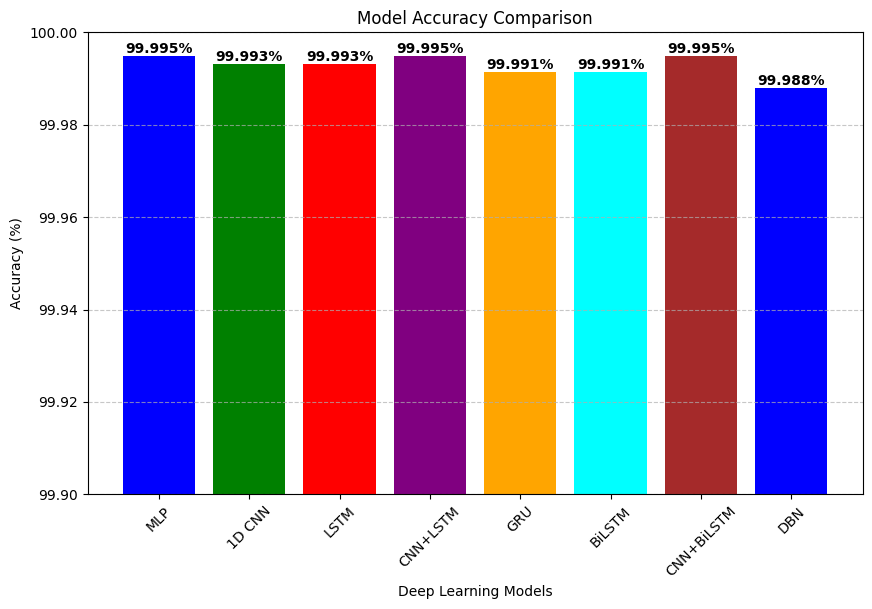

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define models and accuracy values (converted to percentage)
models = ["MLP", "1D CNN", "LSTM", "CNN+LSTM", "GRU", "BiLSTM", "CNN+BiLSTM", "DBN"]
accuracy_values = [accuracy, accuracy_cnn, accuracy_lstm, accuracy_cnn_lstm, accuracy_gru, accuracy_bilstm, accuracy_cnn_bilstm, accuracy_dbn]
accuracy_percent = [acc * 100 for acc in accuracy_values]  # Convert to percentage

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Set y-axis limit to focus on 99.9-100 range
ax.set_ylim(99.9, 100)
ax.set_yticks(np.arange(99.9, 100.02, 0.02))  # Fine-grained y-ticks

# Plot bars
colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'brown']
ax.bar(models, accuracy_percent, color=colors)

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Display percentage values on bars
for i, v in enumerate(accuracy_percent):
    ax.text(i, v, f"{v:.3f}%", ha='center', va='bottom', fontsize=10, fontweight='bold')

# Labels and title
ax.set_ylabel("Accuracy (%)")
ax.set_xlabel("Deep Learning Models")
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")

plt.show()
